<a href="https://colab.research.google.com/github/ehpub/KFQ_MLDL_2023/blob/main/2023_kfq_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EB%94%A5%EB%9F%AC%EB%8B%9D_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

강의 교재 : https://wikibook.co.kr/mymlrev/

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, SimpleRNN,Dropout
from keras.layers import Embedding
from keras import models
from keras.datasets import imdb
from keras.utils import pad_sequences

##워드 임베딩

In [2]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=30000)

In [12]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [13]:
max(max(x_train))

29813

In [14]:
word_dic = imdb.get_word_index()

In [15]:
word_dic['hello']

4822

In [16]:
index_dic = {}
for key,value in word_dic.items():
  index_dic[value] = key

In [17]:
index_dic[4822]

'hello'

In [18]:
for i in x_train[0]:
  print(index_dic[i],end=' ')

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room titillate it so heart shows to years of every never going villaronga help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but pratfalls to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other tricky in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of 'n odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from

In [19]:
index_dic[1],index_dic[2],index_dic[3]

('the', 'and', 'a')

In [20]:
for i in range(10):
  print(len(x_train[i]),end=' ')

218 189 141 550 147 43 123 562 233 130 

In [21]:
import matplotlib.pyplot as plt

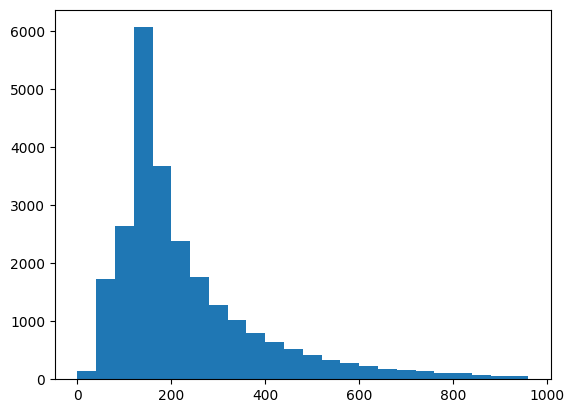

In [22]:
ls = [len(x_train[i]) for i in range(len(x_train))]
plt.hist(ls,bins=range(0,1000,40))
plt.show()

In [23]:
xseq_train = pad_sequences(x_train,maxlen=150)
xseq_test = pad_sequences(x_test,maxlen=150)

In [24]:
for i in range(10):
  print(len(xseq_train[i]),end=' ')

150 150 150 150 150 150 150 150 150 150 

In [9]:
xseq_train[5]

NameError: ignored

In [34]:
xseq_train.shape, xseq_test.shape

((25000, 150), (25000, 150))

In [18]:
np.unique(y_train)

array([0, 1])

In [35]:
model = keras.Sequential()
em=Embedding(30000,16,input_length=150)
rnn = SimpleRNN(20)
dense = Dense(1,activation='sigmoid')
model.add(em)
model.add(rnn)
model.add(dense)

In [36]:
model.compile(loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [37]:
cp = keras.callbacks.EarlyStopping(patience=20,
                                   restore_best_weights=True)
hist = model.fit(xseq_train,y_train,callbacks=[cp],
                 validation_split=0.2,
                 epochs=1000)

Epoch 1/1000
625/625 [==============================] - 29s 44ms/step - loss: 0.5221 - accuracy: 0.7326 - val_loss: 0.4887 - val_accuracy: 0.7946
Epoch 2/1000
625/625 [==============================] - 25s 40ms/step - loss: 0.3225 - accuracy: 0.8701 - val_loss: 0.3572 - val_accuracy: 0.8514
Epoch 3/1000
625/625 [==============================] - 24s 38ms/step - loss: 0.2606 - accuracy: 0.8993 - val_loss: 0.3546 - val_accuracy: 0.8420
Epoch 4/1000
625/625 [==============================] - 24s 38ms/step - loss: 0.2083 - accuracy: 0.9225 - val_loss: 0.3604 - val_accuracy: 0.8484
Epoch 5/1000
625/625 [==============================] - 25s 40ms/step - loss: 0.1666 - accuracy: 0.9398 - val_loss: 0.3736 - val_accuracy: 0.8592
Epoch 6/1000
625/625 [==============================] - 25s 40ms/step - loss: 0.1294 - accuracy: 0.9536 - val_loss: 0.4537 - val_accuracy: 0.8168
Epoch 7/1000
625/625 [==============================] - 26s 42ms/step - loss: 0.0990 - accuracy: 0.9655 - val_loss: 0.4789 -

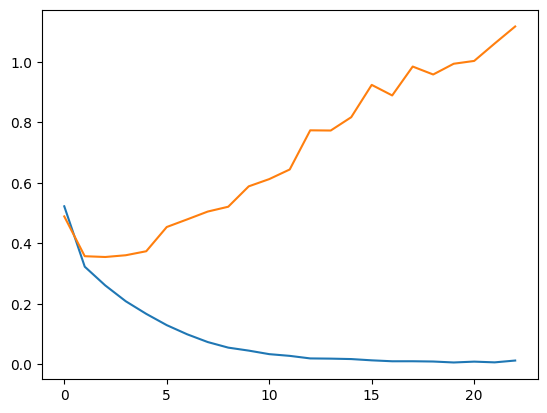

In [39]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val loss')
plt.show()

In [47]:
model = keras.Sequential()
em=Embedding(30000,16,input_length=150)
rnn = SimpleRNN(20)
drop = Dropout(0.6)
dense = Dense(1,activation='sigmoid')
model.add(em)
model.add(rnn)
model.add(drop)
model.add(dense)

In [48]:
model.compile(loss = keras.losses.binary_crossentropy)

In [49]:
cp = keras.callbacks.EarlyStopping(patience=10,
                                   restore_best_weights=True)
hist = model.fit(xseq_train,y_train,callbacks=[cp],
                 validation_split=0.2,
                 epochs=1000)

Epoch 1/1000
625/625 [==============================] - 26s 41ms/step - loss: 0.5532 - val_loss: 0.4064
Epoch 2/1000
625/625 [==============================] - 25s 40ms/step - loss: 0.3639 - val_loss: 0.4069
Epoch 3/1000
625/625 [==============================] - 25s 40ms/step - loss: 0.3039 - val_loss: 0.3615
Epoch 4/1000
625/625 [==============================] - 25s 41ms/step - loss: 0.2701 - val_loss: 0.3977
Epoch 5/1000
625/625 [==============================] - 24s 39ms/step - loss: 0.2450 - val_loss: 0.3518
Epoch 6/1000
625/625 [==============================] - 25s 40ms/step - loss: 0.2177 - val_loss: 0.3932
Epoch 7/1000
625/625 [==============================] - 26s 41ms/step - loss: 0.1864 - val_loss: 0.3684
Epoch 8/1000
625/625 [==============================] - 26s 41ms/step - loss: 0.1630 - val_loss: 0.4094
Epoch 9/1000
625/625 [==============================] - 26s 42ms/step - loss: 0.1399 - val_loss: 0.5341
Epoch 10/1000
625/625 [==============================] - 26s 42m

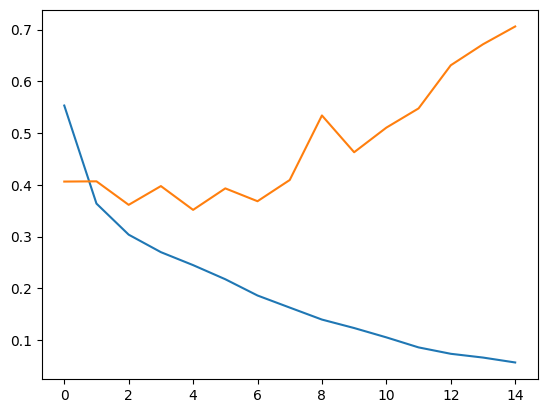

In [50]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val loss')
plt.show()

## 원핫인코딩

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, SimpleRNN,Dropout
from keras.layers import Embedding
from keras import models
from keras.datasets import imdb
from keras.utils import pad_sequences
import gc

In [2]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=30000)
xseq_train = pad_sequences(x_train,maxlen=150)
xseq_test = pad_sequences(x_test,maxlen=150)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
model = keras.Sequential()
rnn = SimpleRNN(20,input_shape=(150,30000))
drop = Dropout(0.6)
dense = Dense(1,activation='sigmoid')
model.add(rnn)
model.add(drop)
model.add(dense)
model.compile(loss = keras.losses.binary_crossentropy)
cp = keras.callbacks.ModelCheckpoint('cp.h5',save_best_only=True)

In [4]:
for i in range(250):
  print(i,end=' ')
  xtemp = xseq_train[i*100:(i+1)*100]
  xo_train = keras.utils.to_categorical(xtemp,
                                        num_classes=30000)
  yo_train = y_train[i*100:(i+1)*100]
  model.fit(xo_train,yo_train,
            callbacks=[cp],
            validation_split=0.1,verbose=0)
  del xo_train
  print(gc.get_count())
  gc.collect()

0 (549, 1, 10)
1 (127, 3, 0)
2 (316, 3, 0)
3 (84, 3, 0)
4 (333, 3, 0)
5 (187, 3, 0)
6 (180, 3, 0)
7 (181, 3, 0)
8 (117, 3, 0)
9 (119, 3, 0)
10 (114, 3, 0)
11 (237, 3, 0)
12 (117, 3, 0)
13 (230, 3, 0)
14 (120, 3, 0)
15 (102, 3, 0)
16 (55, 3, 0)
17 (313, 3, 0)
18 (280, 3, 0)
19 (104, 3, 0)
20 (67, 3, 0)
21 (327, 3, 0)
22 (78, 3, 0)
23 (232, 3, 0)
24 (235, 3, 0)
25 (114, 3, 0)
26 (78, 3, 0)
27 (143, 3, 0)
28 (400, 3, 0)
29 (100, 3, 0)
30 (288, 3, 0)
31 (78, 3, 0)
32 (78, 3, 0)
33 (104, 3, 0)
34 (232, 3, 0)
35 (63, 3, 0)
36 (118, 3, 0)
37 (104, 3, 0)
38 (334, 3, 0)
39 (237, 3, 0)
40 (327, 3, 0)
41 (59, 3, 0)
42 (104, 3, 0)
43 (65, 3, 0)
44 (117, 3, 0)
45 (117, 3, 0)
46 (356, 3, 0)
47 (78, 3, 0)
48 (118, 3, 0)
49 (65, 3, 0)
50 (71, 3, 0)
51 (104, 3, 0)
52 (69, 3, 0)
53 (72, 3, 0)
54 (67, 3, 0)
55 (331, 3, 0)
56 (232, 3, 0)
57 (69, 3, 0)
58 (67, 3, 0)
59 (117, 3, 0)
60 (208, 3, 0)
61 (119, 3, 0)
62 (114, 3, 0)
63 (67, 3, 0)
64 (145, 3, 0)
65 (327, 3, 0)
66 (104, 3, 0)
67 (67, 3, 0)
68 (81, 3

ValueError: ignored

In [5]:
i=0
xtemp = xseq_test[i*100:(i+1)*100]
xo_temp = keras.utils.to_categorical(xtemp,
                                        num_classes=30000)
yo_test = y_test[i*100:(i+1)*100]
model.evaluate(xo_temp,yo_test)

4/4 [==============================] - 3s 483ms/step - loss: 0.5232


0.5231642723083496

In [6]:
model2 = keras.models.load_model('/content/cp.h5')
cp = keras.callbacks.ModelCheckpoint('cp1.h5',save_best_only=True)

In [7]:
for i in range(250):
  print(i,end=' ')
  xtemp = xseq_train[i*100:(i+1)*100]
  xo_train = keras.utils.to_categorical(xtemp,
                                        num_classes=30000)
  yo_train = y_train[i*100:(i+1)*100]
  model.fit(xo_train,yo_train,
            callbacks=[cp],
            validation_split=0.1,verbose=0)
  del xo_train
  print(gc.get_count())
  gc.collect()

0 (420, 0, 1)
1 (108, 3, 0)
2 (269, 3, 0)
3 (135, 3, 0)
4 (114, 3, 0)
5 (121, 3, 0)
6 (99, 3, 0)
7 (78, 3, 0)
8 (80, 3, 0)
9 (121, 3, 0)
10 (332, 3, 0)
11 (136, 3, 0)
12 (121, 3, 0)
13 (214, 3, 0)
14 (115, 3, 0)
15 (123, 3, 0)
16 (112, 3, 0)
17 (88, 3, 0)
18 (78, 3, 0)
19 (334, 3, 0)
20 (116, 3, 0)
21 (123, 3, 0)
22 (242, 3, 0)
23 (110, 3, 0)
24 (73, 3, 0)
25 (100, 3, 0)
26 (79, 3, 0)
27 (83, 3, 0)
28 (358, 3, 0)
29 (79, 3, 0)
30 (147, 3, 0)
31 (240, 3, 0)
32 (114, 3, 0)
33 (81, 3, 0)
34 (130, 3, 0)
35 (107, 3, 0)
36 (140, 3, 0)
37 (65, 3, 0)
38 (80, 3, 0)
39 (386, 3, 0)
40 (108, 3, 0)
41 (78, 3, 0)
42 (214, 3, 0)
43 (81, 3, 0)
44 (100, 3, 0)
45 (65, 3, 0)
46 (88, 3, 0)
47 (114, 3, 0)
48 (109, 3, 0)
49 (55, 3, 0)
50 (245, 3, 0)
51 (199, 3, 0)
52 (214, 3, 0)
53 (78, 3, 0)
54 (335, 3, 0)
55 (113, 3, 0)
56 (126, 3, 0)
57 (78, 3, 0)
58 (109, 3, 0)
59 (109, 3, 0)
60 (65, 3, 0)
61 (123, 3, 0)
62 (330, 3, 0)
63 (386, 3, 0)
64 (126, 3, 0)
65 (240, 3, 0)
66 (78, 3, 0)
67 (136, 3, 0)
68 (116, 3,

In [8]:
i=1
xtemp = xseq_test[i*100:(i+1)*100]
xo_temp = keras.utils.to_categorical(xtemp,
                                        num_classes=30000)
yo_test = y_test[i*100:(i+1)*100]
model.evaluate(xo_temp,yo_test)

4/4 [==============================] - 3s 553ms/step - loss: 0.3725


0.37246331572532654